In [1]:
#For installing the fork of pynucastro with partition functions.
#!pip install -e ../

In [2]:
import numpy as np
import pynucastro as pyna   
import matplotlib.pyplot as plt
from pynucastro.networks import StarKillerNetwork                              
library_file = '/Users/chris/Documents/GitHub/flame-wave/reaction_networks//re\
sults07070315'                                                                 
                                                                               
mylibrary = pyna.rates.Library(library_file)                                   
                                                                               
nuclei = ['n', 'c12', 'mg23']                                                  
                                                                               
lib = mylibrary.linking_nuclei(nuclei, with_reverse=True)                      
network = pyna.StarKillerNetwork(libraries=lib)                                
#remake the network with only #c12 + c12 -> n + mg23                           
network = pyna.StarKillerNetwork(rates=network.rates[0])                       
#network.write_network()                                                                      

In [3]:
network.unique_nuclei[2]

mg23

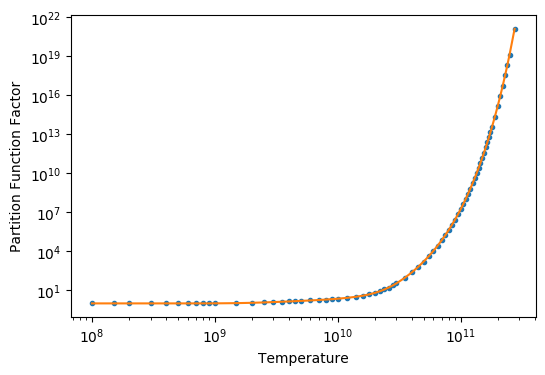

In [4]:
pf = network.unique_nuclei[2].get_partition_function()
temp = network.unique_nuclei[2].get_partition_function().temperature
pf_data = network.unique_nuclei[2].get_partition_function().partition_function

plt.loglog(temp, pf_data, '.')
plt.loglog(temp, pf(temp))
plt.ylabel("Partition Function Factor")
plt.xlabel("Temperature");

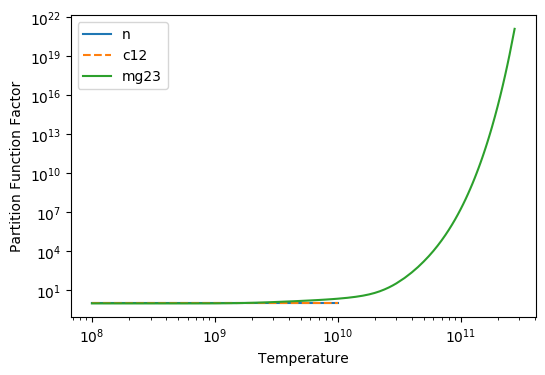

In [5]:
for nuclei in network.unique_nuclei:
    pf = nuclei.get_partition_function()
    temp = nuclei.get_partition_function().temperature
    
    if nuclei.raw == 'c12':
        plt.loglog(temp, pf(temp), '--', label=nuclei)
    else:
        plt.loglog(temp, pf(temp), label=nuclei)
plt.ylabel("Partition Function Factor")
plt.xlabel("Temperature")
plt.legend();

#This plot shows that n and c12 both have a partition factor 1 for all temperatures.
#So the only effect should be from mg23.

In [6]:
#The solution we look for in the unit test
network.unique_nuclei[2].get_partition_function()(1e10)

2.2940000000000005